# N Queens Problem Variation
## Shubham Chury
## IMS19214
## 12-10-2023

In [123]:
import time

In [1]:
import numpy as np
class NQueenProblem:

  def __init__(self, n):
    self.n = n
    self.start_state = self.create_start_state()

  def create_start_state(self):
    import numpy as np
    board = np.zeros([8,8])
    for i in range(0, self.n):
      board[i, i]=1
    self.start_state = board
    return board

  def end_state(self, board):
    ## horizontal & vertical
    for i in range(0, 8):
      if sum(board[i,]) > 1:
        return False
      if sum(board[:,i]) > 1:
        return False
    ## diagonal
    for i in range(self.n):
      for j in range(i+1, self.n):
        xpos1 = np.nonzero(board)[1][i]
        xpos2 = np.nonzero(board)[1][j]
        ypos1 = np.nonzero(board)[0][i]
        ypos2 = np.nonzero(board)[0][j]

        if (abs((ypos1 - ypos2)/(xpos1 - xpos2)) == 1):
          return False
    return True

  def action(self, board, qi, dir):
    newboard = np.array(board)
    xpos = np.nonzero(board)[1][qi]
    ypos = np.nonzero(board)[0][qi]
    #print(xpos, ypos)

    if (dir == "L"):
      if xpos == 0:
        return (False, (qi, "L"), newboard, 0)
      #print("OLD POSITION")
      #print(board)
      newboard[ypos, xpos] = 0
      newboard[ypos, xpos-1] = 1
      #print("ACTION: ", qi, incs, dir)
      #print("NEW POSITION")
      #print(board)
      return (True, (qi, "L"), newboard, 1)

    if (dir == "R"):
      if xpos == 7:
        return [False, (qi, "R"), newboard, 0]
      #print("OLD POSITION")
      #print(board)
      newboard[ypos, xpos] = 0
      newboard[ypos, xpos+1] = 1
      #print("ACTION: ", qi, smn, dir)
      #print("NEW POSITION")
      #print(board)
      return (True, (qi, "R"), newboard, 1)

    return (False, (qi, ""), newboard, 0)

  def action_board_cost(self,board):
        # create (action, new_state, cpies) tuple
        result=[]

        for i in range(0, self.n):
            newrl = self.action(board, i, "L")
            #print(newrl[1:4])
            if newrl[0]:
              result.append(newrl[1:4])

            newrr = self.action(board, i, "R")
            #print(newrr[1:4])
            if newrr[0]:
              result.append(newrr[1:4])
        #print(result)
        return result
    

In [2]:
def sort_tuple(tup):
    tup.sort(key=lambda x: x[2],reverse=True)
    return tup

In [107]:
def uniformcostsearch(problem=NQueenProblem(n=4)):
    frontier={}
    explored={}
    frontier[tuple(map(tuple, problem.start_state))]=0
    parent = {}
    ncost = {}
    ncost[tuple(map(tuple, problem.start_state))] = 0
    stepto = {}
    while len(frontier)>0:

        state_with_minimum_pastcost=min(frontier, key=frontier.get) ##current
        value=frontier[state_with_minimum_pastcost] ##current cost
        explored[state_with_minimum_pastcost]=value ##into explored
        del frontier[state_with_minimum_pastcost] ##out of frontier

        if problem.end_state(np.array(state_with_minimum_pastcost)): ##Check end state
            n = state_with_minimum_pastcost
            hist = []
            stephist = []
            while True:
                hist.append(n)
                if np.all(problem.start_state == np.array(n)):
                    break
                stephist.append(stepto[n])
                n = parent[n]
            return(explored[state_with_minimum_pastcost], state_with_minimum_pastcost, hist[::-1], stephist[::-1])
        for action, newState, cost in sort_tuple(problem.action_board_cost(np.array(state_with_minimum_pastcost))): ## for child of current
            if tuple(map(tuple, newState)) in explored: ## if explored
                if ncost[tuple(map(tuple, newState))] > cost + value:
                    ncost[tuple(map(tuple, newState))] = cost + value
                    parent[tuple(map(tuple, newState))] = state_with_minimum_pastcost
                    stepto[tuple(map(tuple, newState))] = action
                continue
            else:
                frontier[tuple(map(tuple, newState))]= cost + value
                ncost[tuple(map(tuple, newState))] = cost + value
                parent[tuple(map(tuple, newState))] = state_with_minimum_pastcost
                stepto[tuple(map(tuple, newState))] = action

In [118]:
def display(solution):
    mincost, final_state, path, steps = solution
    print("MINIMUM COST: ", mincost)
    print("FINAL STATE:")
    print(np.array(final_state))
    print()
    print("PATH:")
    for i in range(0, len(steps)):
        print(np.array(path[i]))
        print(np.array(steps[i]))
    print(np.array(final_state))

In [119]:
display(uniformcostsearch(problem=NQueenProblem(n=4)))

MINIMUM COST:  4
FINAL STATE:
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]

PATH:
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
['3' 'R']
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
['2' 'L']
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
['1' 'R']
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 

In [120]:
display(uniformcostsearch(problem=NQueenProblem(n=5)))

MINIMUM COST:  6
FINAL STATE:
[[0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]

PATH:
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
['3' 'L']
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
['3' 'L']
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
['2' 'R']
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 

In [121]:
display(uniformcostsearch(problem=NQueenProblem(n=6)))

MINIMUM COST:  9
FINAL STATE:
[[0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]

PATH:
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
['5' 'R']
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
['3' 'L']
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
['3' 'L']
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 

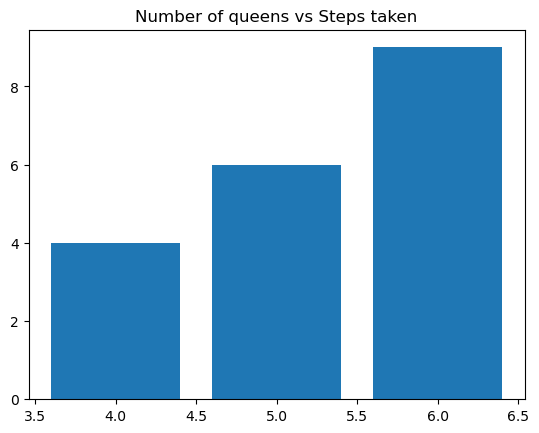

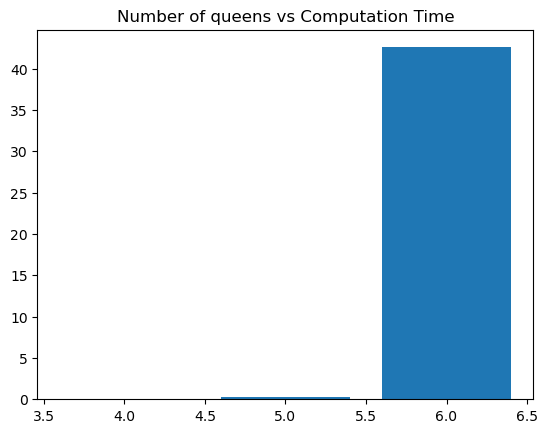

In [140]:
st4 = time.process_time()
steps4 = uniformcostsearch(problem=NQueenProblem(n=4))[0]
et4 = time.process_time()
st5 = time.process_time()
steps5 = uniformcostsearch(problem=NQueenProblem(n=5))[0]
et5 = time.process_time()
st6 = time.process_time()
steps6 = uniformcostsearch(problem=NQueenProblem(n=6))[0]
et6 = time.process_time()
##st7 = time.process_time()
##steps7 = uniformcostsearch(problem=NQueenProblem(n=7))[3]
##et7 = time.process_time()

ts = [et4-st4, et5-st5, et6-st6]
steps = [steps4, steps5, steps6]
ns = ["4", "5", "6"]

import matplotlib.pyplot as plt

plt.bar(ns, steps)
plt.title("Number of queens vs Steps taken")
plt.show()

plt.bar(ns, ts)
plt.title("Number of queens vs Computation Time")
plt.show()

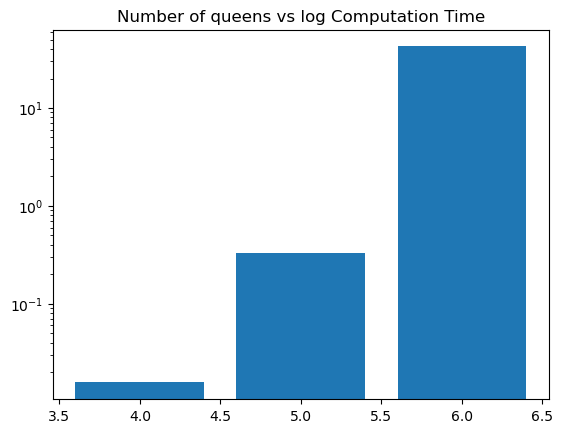

In [142]:
plt.bar(ns, ts)
plt.title("Number of queens vs log Computation Time")
plt.yscale("log") 
plt.show()

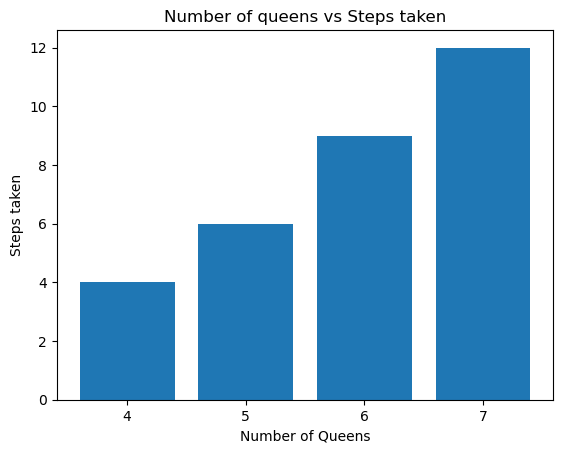

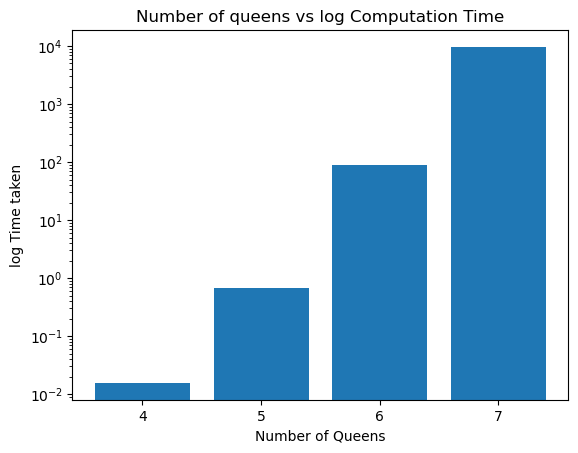

In [143]:
st4 = time.process_time()
steps4 = uniformcostsearch(problem=NQueenProblem(n=4))[0]
et4 = time.process_time()
st5 = time.process_time()
steps5 = uniformcostsearch(problem=NQueenProblem(n=5))[0]
et5 = time.process_time()
st6 = time.process_time()
steps6 = uniformcostsearch(problem=NQueenProblem(n=6))[0]
et6 = time.process_time()
st7 = time.process_time()
steps7 = uniformcostsearch(problem=NQueenProblem(n=7))[0]
et7 = time.process_time()

ts = [et4-st4, et5-st5, et6-st6, et7-st7]
steps = [steps4, steps5, steps6, steps7]
ns = ["4", "5", "6", "7"]

import matplotlib.pyplot as plt

plt.bar(ns, steps)
plt.title("Number of queens vs Steps taken")
plt.xlabel("Number of Queens")
plt.ylabel("Steps taken")
plt.show()

plt.bar(ns, ts)
plt.title("Number of queens vs log Computation Time")
plt.xlabel("Number of Queens")
plt.ylabel("log Time taken")
plt.yscale("log") 
plt.show()

In [144]:
print(et7-st7)

9645.046875


In [130]:
import numpy as np
class NQueenProblemV2:

  def __init__(self, n):
    self.n = n
    self.start_state = self.create_start_state()

  def create_start_state(self):
    import numpy as np
    board = np.zeros([8,8])
    for i in range(0, self.n):
      board[i, i]=1
    self.start_state = board
    return board

  def end_state(self, board):
    ## horizontal & vertical
    for i in range(0, 8):
      if sum(board[i,]) > 1:
        return False
      if sum(board[:,i]) > 1:
        return False
    ## diagonal
    for i in range(self.n):
      for j in range(i+1, self.n):
        xpos1 = np.nonzero(board)[1][i]
        xpos2 = np.nonzero(board)[1][j]
        ypos1 = np.nonzero(board)[0][i]
        ypos2 = np.nonzero(board)[0][j]

        if (abs((ypos1 - ypos2)/(xpos1 - xpos2)) == 1):
          return False
    return True

  def action(self, board, qi, dir):
    newboard = np.array(board)
    xpos = np.nonzero(board)[1][qi]
    ypos = np.nonzero(board)[0][qi]
    #print(xpos, ypos)

    if (dir == "L"):
      if xpos == 0:
        return (False, (qi, "L"), newboard, 0)
      #print("OLD POSITION")
      #print(board)
      newboard[ypos, xpos] = 0
      newboard[ypos, xpos-1] = 1
      #print("ACTION: ", qi, incs, dir)
      #print("NEW POSITION")
      #print(board)
      return (True, (qi, "L"), newboard, 1)

    if (dir == "R"):
      if xpos == 7:
        return [False, (qi, "R"), newboard, 0]
      #print("OLD POSITION")
      #print(board)
      newboard[ypos, xpos] = 0
      newboard[ypos, xpos+1] = 1
      #print("ACTION: ", qi, smn, dir)
      #print("NEW POSITION")
      #print(board)
      return (True, (qi, "R"), newboard, 1)

    return (False, (qi, ""), newboard, 0)

  def action_board_cost(self,board):
        # create (action, new_state, cpies) tuple
        result=[]

        for i in range(0, self.n):
            newrl = self.action(board, self.n-i-1, "L")
            #print(newrl[1:4])
            if newrl[0]:
              result.append(newrl[1:4])

            newrr = self.action(board, self.n-i-1, "R")
            #print(newrr[1:4])
            if newrr[0]:
              result.append(newrr[1:4])
        #print(result)
        return result
    

In [131]:
st = time.process_time()
display(uniformcostsearch(problem=NQueenProblem(n=5)))
et = time.process_time()
print("Time elapsed: ", et-st)

MINIMUM COST:  6
FINAL STATE:
[[0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]

PATH:
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
['3' 'L']
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
['3' 'L']
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
['2' 'R']
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 

In [132]:
st = time.process_time()
display(uniformcostsearch(problem=NQueenProblemV2(n=5)))
et = time.process_time()
print("Time elapsed: ", et-st)

MINIMUM COST:  6
FINAL STATE:
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]

PATH:
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
['1' 'R']
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
['1' 'R']
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
['2' 'L']
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 

In [133]:
st = time.process_time()
display(uniformcostsearch(problem=NQueenProblem(n=6)))
et = time.process_time()
print("Time elapsed: ", et-st)

MINIMUM COST:  9
FINAL STATE:
[[0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]

PATH:
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
['5' 'R']
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
['3' 'L']
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
['3' 'L']
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 

In [134]:
st = time.process_time()
display(uniformcostsearch(problem=NQueenProblemV2(n=6)))
et = time.process_time()
print("Time elapsed: ", et-st)

MINIMUM COST:  9
FINAL STATE:
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]

PATH:
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
['1' 'R']
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
['2' 'R']
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
['2' 'R']
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 